In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator)
import numpy as np

#### Load data

In [99]:
data = pd.read_csv("population_sizes.csv")

In [100]:
data.head()

,report_month,churn,gain,total,registrations
0,2009-01-01,0.0,24.0,0.0,11946
1,2009-02-01,2.0,14.0,24.0,12049
2,2009-03-01,3.0,4.0,36.0,11697
3,2009-04-01,3.0,4.0,37.0,9582
4,2009-05-01,2.0,3.0,38.0,10052


In [101]:
len(data)

156

#### 1) Churn rate, conversion rate, regisztracio novekedesi utem, ami eszembe jut

Mivel nincs lemorzsolódó 2009 január elöttről azt feltételezem, hogy ekkor indul az egész biznisz úgy, ahogy van, vagyis az összes regisztrált száma egy kummulált összeg lesz.

In [102]:
data = data.assign(
    user_count = lambda x:x.registrations.cumsum(),
    reg_rate_per_user = lambda x: x.registrations / x.user_count,
    churn_rate_per_subscriber = lambda x: x.churn / x.total,
    churn_rate_per_user = lambda x: x.churn / x.user_count,
    conv_rate_per_subscriber = lambda x: x.gain / x.total,
    conv_rate_per_user = lambda x:x.gain / x.user_count,
    reg_delta = lambda x: x.registrations / x.registrations.shift(1),
    churn_delta = lambda x: x.churn / x.churn.shift(1),
    gain_delta = lambda x: x.gain / x.gain.shift(1),
    date = lambda x: pd.to_datetime(x.report_month),
    year = lambda x: x.date.dt.year,
    month = lambda x: x.date.dt.month,
    net_gain = lambda x: x.gain - x.churn,
    churn_rate_per_user_1 = lambda x: x.churn_rate_per_user + x.churn_rate_per_user.min() 
)

In [103]:
data.head()

,report_month,churn,gain,total,registrations,user_count,reg_rate_per_user,churn_rate_per_subscriber,churn_rate_per_user,conv_rate_per_subscriber,conv_rate_per_user,reg_delta,churn_delta,gain_delta,date,year,month,net_gain,churn_rate_per_user_1
0,2009-01-01,0.0,24.0,0.0,11946,11946,1.000000,NaN,0.000000,inf,0.002009,NaN,NaN,NaN,2009-01-01,2009,1,24.0,0.000000
1,2009-02-01,2.0,14.0,24.0,12049,23995,0.502146,0.083333,0.000083,0.583333,0.000583,1.008622,inf,0.583333,2009-02-01,2009,2,12.0,0.000083
2,2009-03-01,3.0,4.0,36.0,11697,35692,0.327720,0.083333,0.000084,0.111111,0.000112,0.970786,1.500000,0.285714,2009-03-01,2009,3,1.0,0.000084
3,2009-04-01,3.0,4.0,37.0,9582,45274,0.211645,0.081081,0.000066,0.108108,0.000088,0.819184,1.000000,1.000000,2009-04-01,2009,4,1.0,0.000066
4,2009-05-01,2.0,3.0,38.0,10052,55326,0.181687,0.052632,0.000036,0.078947,0.000054,1.049050,0.666667,0.750000,2009-05-01,2009,5,1.0,0.000036


In [104]:
data.dtypes

report_month                         object
churn                               float64
gain                                float64
total                               float64
registrations                         int64
user_count                            int64
reg_rate_per_user                   float64
churn_rate_per_subscriber           float64
churn_rate_per_user                 float64
conv_rate_per_subscriber            float64
conv_rate_per_user                  float64
reg_delta                           float64
churn_delta                         float64
gain_delta                          float64
date                         datetime64[ns]
year                                  int32
month                                 int32
net_gain                            float64
churn_rate_per_user_1               float64
dtype: object

#### 2) Populáció dinamikája

A populáció alatt az előfizetőket és a regisztrálókat is érthetjük. Lesz egy, ezek abszolút értékét ábrázoló ábra és egy, ami az új előfizetők, regisztrálók, lemorzsolódók változásának az ütemét ábrázolja majd


##### a) Plot - Élő regisztrált és előfizető fiókok száma

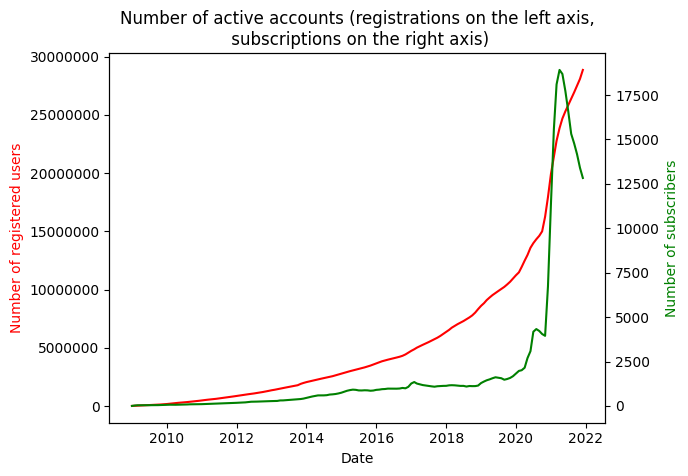

In [105]:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["user_count"],color = "red")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of registered users",color = "red")
ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.0f'))
ax1.set_title("Number of active accounts (registrations on the left axis,\n subscriptions on the right axis)")

ax2 = ax1.twinx()
ax2.plot(data["date"],data["total"], color = "green")
ax2.set_ylabel("Number of subscribers",color = "green")
plt.show()

##### b) Plot - Havi új regisztrációk és előfizetések nettó számának alakulása

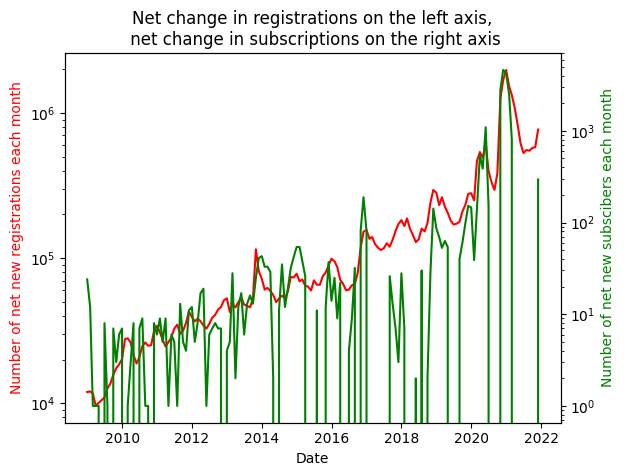

In [106]:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["registrations"],color = "red")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of net new registrations each month",color = "red")
ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.0f'))
ax1.set_title("Net change in registrations on the left axis,\n net change in subscriptions on the right axis")
ax1.set_yscale('log')

ax2 = ax1.twinx()
ax2.plot(data["date"],data["net_gain"], color = "green")
ax2.set_ylabel("Number of net new subscibers each month",color = "green")
ax2.set_yscale('log')
plt.show()

In [107]:
data.columns

Index(['report_month', 'churn', 'gain', 'total', 'registrations', 'user_count',
       'reg_rate_per_user', 'churn_rate_per_subscriber', 'churn_rate_per_user',
       'conv_rate_per_subscriber', 'conv_rate_per_user', 'reg_delta',
       'churn_delta', 'gain_delta', 'date', 'year', 'month', 'net_gain',
       'churn_rate_per_user_1'],
      dtype='object')

##### c) Plot - Conversion rate and churn rate on a log scale

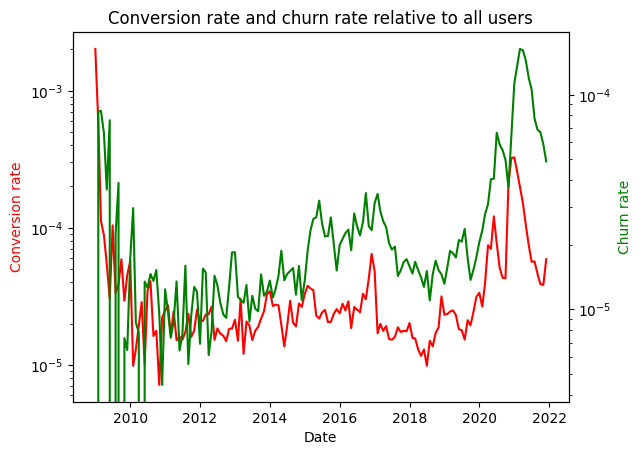

In [110]:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["conv_rate_per_user"],color = "red")
ax1.set_xlabel("Date")
ax1.set_ylabel("Conversion rate",color = "red")
ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.0f'))
ax1.set_title("Conversion rate and churn rate relative to all users")
ax1.set_yscale('log')

ax2 = ax1.twinx()
ax2.plot(data["date"],data["churn_rate_per_user_1"], color = "green")
ax2.set_ylabel("Churn rate",color = "green")
ax2.set_yscale('log')
plt.show()

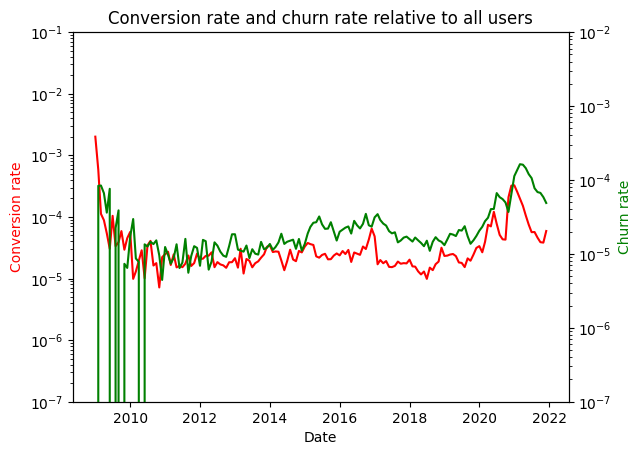

In [83]:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["conv_rate_per_user"],color = "red")
ax1.set_xlabel("Date")
ax1.set_ylabel("Conversion rate",color = "red")
ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.0f'))
ax1.set_title("Conversion rate and churn rate relative to all users")
ax1.set_yscale('log')

ax2 = ax1.twinx()
ax2.plot(data["date"],data["churn_rate_per_user"], color = "green")
ax2.set_ylabel("Churn rate",color = "green")
ax2.set_yscale('log')

y1mn, y1mx = ax1.get_ylim() ; y1ticks = ax1.get_yticks()
y2mn, y2mx = ax2.get_ylim() ; y2ticks = ax2.get_yticks()



d1 = y1mx-y1mn
d2 = y2mx-y2mn

r1=-y1mx/y1mn
r2=-y2mx/y2mn

if d1>d2:
    if r1>r2:
        y2mx = -y2mn*r1
    else:
        y2mn = -y2mx/r1
else:
    if r2>r1:
        y1mx = -y1mn*r2
    else:
        y1mn = -y1mx/r2

ax1.set_ylim(y1mn,y1mx) ; ax1.set_yticks(y1ticks)
ax2.set_ylim(y2mn,y2mx) ; ax2.set_yticks(y2ticks)

plt.show()

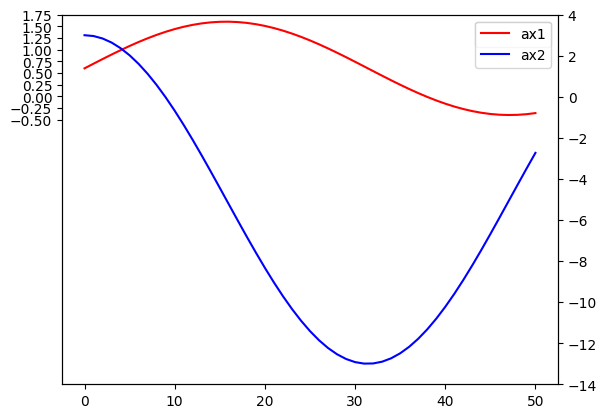

In [81]:
a = 1.0*np.sin(np.linspace(0,5,51))+0.6
b = 8.0*np.cos(np.linspace(0,5,51))-5.0

fig,ax1 = plt.subplots()
l1, = ax1.plot(a,'r-', label='ax1')
plt.legend()
ax2 = ax1.twinx()
l2, = ax2.plot(b,'b-', label='ax2')

y1mn, y1mx = ax1.get_ylim() ; y1ticks = ax1.get_yticks()
y2mn, y2mx = ax2.get_ylim() ; y2ticks = ax2.get_yticks()

if y1mn*y1mx > 0 : error()
if y2mn*y2mx > 0 : error()

d1 = y1mx-y1mn
d2 = y2mx-y2mn

r1=-y1mx/y1mn
r2=-y2mx/y2mn

if d1>d2:
    if r1>r2:
        y2mx = -y2mn*r1
    else:
        y2mn = -y2mx/r1
else:
    if r2>r1:
        y1mx = -y1mn*r2
    else:
        y1mn = -y1mx/r2

ax1.set_ylim(y1mn,y1mx) ; ax1.set_yticks(y1ticks)
ax2.set_ylim(y2mn,y2mx) ; ax2.set_yticks(y2ticks)
"""
for ax, c in ((ax1,'r'),(ax2,'b')):
    [lbl.set_color(c) for lbl in ax.get_yticklabels()]
"""




plt.legend((l1,l2),('ax1','ax2'))
plt.show()


#### Jelezzétek előre a 2022.01.01-t követő 12 hónap növekedését havi szinten!
A churn, a gain, a total és a registrations is érdekel!
Milyen metrika szerint érdemes értékelni?

Lehet, hogy full faszság, de a regisztrációk és a lemorzsolódók számával hülyeségnek tűnik az előfizetések számát prediktálni, ezért csak az időt fogom felhasználni. Itt az órai kódokat fogom használni kreativitás hiányában

In [52]:
data["month_counter"] = range(1, len(data) + 1)

0        1
1        2
2        3
3        4
4        5
      ... 
151    152
152    153
153    154
154    155
155    156
Name: month_counter, Length: 156, dtype: int64